# United Airlines
## Skyhack Hackathon

In [46]:
import pandas as pd
import numpy as np

#### Basic Exploratory Data Analysis

In [47]:
calls_df = pd.read_csv("callsf0d4f5a.csv")
calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [48]:
customers_df = pd.read_csv("customers2afd6ea.csv")
customers_df.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [49]:
reasons_df = pd.read_csv("reason18315ff.csv")
reasons_df.head()
# distinct fields present in reasons

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [50]:
sentiment_df = pd.read_csv("sentiment_statisticscc1e57a.csv")
sentiment_df.head()
# disitnct sentiments present in customer_tone and agent tone

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [51]:
test_df = pd.read_csv("testbc7185d.csv")
test_df.head()

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168


In [52]:
calls_df.describe()

,call_id,customer_id,agent_id
count,7.181000e+04,7.181000e+04,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039
std,2.889673e+09,2.884255e+09,257532.362167
min,1.316420e+05,1.197800e+04,102574.000000
25%,2.480013e+09,2.514618e+09,347606.000000
50%,4.989448e+09,4.999664e+09,591778.000000
75%,7.493629e+09,7.509126e+09,786323.000000
max,9.999806e+09,9.999935e+09,993862.000000


In [53]:
customers_df.isnull().sum()

customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64

In [54]:
calls_df.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

In [55]:
reasons_df.isnull().sum()

call_id                0
primary_call_reason    0
dtype: int64

In [56]:
sentiment_df.isnull().sum()

call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64

In [57]:
calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


### Standardizing Call Timings and Agent Assigned Date time to a more standardized format

In [58]:
#converting call startime, call endtime, agent assigned time to standard format
from datetime import datetime
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...


### Fining Handle Time and Speed Time

In [59]:
# Creating new features: Handle Time and Speed to Answer
calls_df['handle_time'] = (calls_df['call_end_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()
calls_df['speed_to_answer'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,speed_to_answer
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0


In [60]:
# Average Handle Time (AHT)
total_handle_time = calls_df['handle_time'].sum()
total_calls = calls_df['call_id'].count()
aht = total_handle_time / total_calls
print(f"Calculated Average Handle Time (AHT): {aht:.2f} seconds")

# Average Speed to Answer (AST)
total_waiting_time = calls_df['speed_to_answer'].sum()
ast = total_waiting_time / total_calls
print(f"Calculated Average Speed to Answer (AST): {ast:.2f} seconds")

Calculated Average Handle Time (AHT): 1134.12 seconds
Calculated Average Speed to Answer (AST): 437.07 seconds


In [61]:
# Merge datasets
merged_df = pd.merge(calls_df, customers_df, on='customer_id', how='left')
merged_df = pd.merge(merged_df, reasons_df, on='call_id', how='left')
merged_df = pd.merge(merged_df, sentiment_df, on='call_id', how='left')

In [62]:
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,speed_to_answer,customer_name,elite_level_code,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0,Matthew Foster,4.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0,Tammy Walters,NaN,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0,Jeffery Dixon,NaN,IRROPS,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0,David Wilkins,2.0,Upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0,Elizabeth Daniels,0.0,Seating,721730,neutral,polite,-0.05,0.35


### Analysing the average handle time taken by every agent to see any discrepencies

In [63]:
# Calculating AHT and AST
# Overall AHT and AST is calculated as the mean of the of the columns handle_time and spped_to_answer in the merged dataframe
o_aht = merged_df['handle_time'].mean()/60
o_ast = merged_df['speed_to_answer'].mean()/60

print(f"Average Handle Time: {o_aht:.2f} minutes")
print(f"Average Speed to Answer: {o_ast:.2f} minutes")


Average Handle Time: 18.90 minutes
Average Speed to Answer: 7.28 minutes


### Analysing Agent Performance based AHT And AST

In [64]:
# Group by agent and calculate metrics
agent_metrics = merged_df.groupby('agent_id_x').agg({
    'handle_time': ['mean', 'median', 'std'],
    'speed_to_answer': ['mean', 'median', 'std'],
    'call_id': 'count'
}).reset_index()
agent_metrics.columns = ['agent_id', 'avg_handle_time', 'median_handle_time', 'std_handle_time',
                         'avg_speed_to_answer', 'median_speed_to_answer', 'std_speed_to_answer', 'total_calls']
agent_metrics.head()

,agent_id,avg_handle_time,median_handle_time,std_handle_time,avg_speed_to_answer,median_speed_to_answer,std_speed_to_answer,total_calls
0,102574,4080.000000,4080.0,4751.757570,480.000000,480.0,84.852814,2
1,103651,1168.187919,900.0,812.107085,420.805369,420.0,150.713306,298
2,106000,1127.256637,900.0,713.607845,438.053097,420.0,155.033743,113
3,107876,1460.000000,1410.0,697.309114,470.000000,420.0,153.753049,6
4,112609,1336.363636,900.0,1138.132442,485.454545,540.0,138.011857,11


In [65]:
# Identify agents with highest handle times
top_agents = agent_metrics.sort_values(by='avg_handle_time', ascending=False).head(10)
print("Top 10 Agents by Average Handle Time:")
print(top_agents[['agent_id', 'avg_handle_time', 'total_calls']])

Top 10 Agents by Average Handle Time:
     agent_id  avg_handle_time  total_calls
0      102574      4080.000000            2
160    506130      3300.000000            1
16     140146      2980.000000            3
60     255256      2900.000000            3
187    558705      2400.000000            2
13     136065      2220.000000            7
91     336455      2220.000000            3
280    780490      2060.000000            3
115    384932      1950.000000            2
343    906082      1913.333333            9


In [66]:
# Calculate deviation of each agent's AHT from the overall average
overall_avg_handle_time = merged_df['handle_time'].mean()
agent_metrics['aht_deviation'] = agent_metrics['avg_handle_time'] - overall_avg_handle_time

# Identify agents with high deviations
high_aht_agents = agent_metrics[agent_metrics['aht_deviation'] > 0].sort_values(by='aht_deviation', ascending=False)
print("Agents with Higher Than Average Handle Time:")
print(high_aht_agents[['agent_id', 'avg_handle_time', 'aht_deviation', 'total_calls']].head(10))

Agents with Higher Than Average Handle Time:
     agent_id  avg_handle_time  aht_deviation  total_calls
0      102574      4080.000000    2945.883860            2
160    506130      3300.000000    2165.883860            1
16     140146      2980.000000    1845.883860            3
60     255256      2900.000000    1765.883860            3
187    558705      2400.000000    1265.883860            2
13     136065      2220.000000    1085.883860            7
91     336455      2220.000000    1085.883860            3
280    780490      2060.000000     925.883860            3
115    384932      1950.000000     815.883860            2
343    906082      1913.333333     779.217194            9


### Conclusion
Based on the Avg. handle time deviations from overall Avg. handle time. The agents having high deviations needs attention and some steps need to be taken to resolve it

## Analysing the relationship between AHT and Call reasons

#### Standardizing call reasons

In [67]:
import re
def clean_call_reason(reason):
    if pd.isna(reason):  # Handle NaN values
        return np.nan
    # Convert to lowercase
    reason = reason.lower()
    # Remove multiple spaces and strip leading/trailing spaces
    reason = re.sub(r'\s+', ' ', reason).strip()
    return reason

In [68]:
# Replace 'nan' string with actual NaN value
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].replace('nan', np.nan)

# Apply the cleaning function to the `primary_call_reason` column
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].apply(clean_call_reason)

# Define a mapping of variations to standard terms
variation_mapping = {
    'check-in': 'check in',
    'post-flight': 'post flight',
    'products & services': 'products and services',
}

# Apply mapping to standardize known variations
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].replace(variation_mapping)

# Step 4: Recheck the unique values
print("Unique Primary Call Reasons after Further Standardization:")
print(merged_df['primary_call_reason'].unique())

# Display the cleaned DataFrame
merged_df.head()


Unique Primary Call Reasons after Further Standardization:
['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' nan 'voluntary change' 'post flight' 'check in' 'other topics'
 'communications' 'schedule change' 'products and services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc']


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,speed_to_answer,customer_name,elite_level_code,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0,Matthew Foster,4.0,voluntary cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0,Tammy Walters,NaN,booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0,Jeffery Dixon,NaN,irrops,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0,David Wilkins,2.0,upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0,Elizabeth Daniels,0.0,seating,721730,neutral,polite,-0.05,0.35


#### Mapping primary call reasons to more broader categories for efficient analysis

In [69]:
reason_to_category = {
    r'booking': 'Booking Issues',
    r'schedule change': 'Booking Issues',
    r'checkout': 'Booking Issues',
    r'voluntary (cancel|change|modification)': 'Cancellation and Changes',
    r'voluntary change': 'Cancellation and Changes',
    r'irrops': 'Cancellation and Changes',
    r'upgrade': 'Upgrades and Seating',
    r'seating': 'Upgrades and Seating',
    r'unaccompanied minor': 'Upgrades and Seating',
    r'baggage': 'Baggage and Traveler Updates',
    r'traveler updates': 'Baggage and Traveler Updates',
    r'digital support': 'Customer Support',
    r'products and services': 'Customer Support',
    r'communications': 'Customer Support',
    r'other topics': 'Customer Support',
    r'etc': 'Customer Support',
    r'post flight': 'Post-Flight Issues',
    r'mileage plus': 'Post-Flight Issues',
    r'disability': 'Accessibility Services'
}

In [70]:
def map_to_broader_category(reason, mapping_dict):
    """ Map detailed reasons to broader categories using regex patterns """
    for pattern, category in mapping_dict.items():
        if re.search(pattern, reason):
            return category
    return 'Customer Support'  # Default category for unmatched reasons

# Apply the broader category mapping
merged_df['broader_category'] = merged_df['primary_call_reason'].astype(str).apply(map_to_broader_category, args=(reason_to_category,))
print(merged_df['broader_category'].unique())

# Display the refined and categorized DataFrame
print("Refined and Categorized Call Reasons:\n")
merged_df.head()

['Cancellation and Changes' 'Booking Issues' 'Upgrades and Seating'
 'Post-Flight Issues' 'Customer Support' 'Accessibility Services'
 'Baggage and Traveler Updates']
Refined and Categorized Call Reasons:



,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,speed_to_answer,customer_name,elite_level_code,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,broader_category
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0,Matthew Foster,4.0,voluntary cancel,963118,neutral,angry,-0.04,0.39,Cancellation and Changes
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0,Tammy Walters,NaN,booking,519057,calm,neutral,0.02,0.35,Booking Issues
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0,Jeffery Dixon,NaN,irrops,158319,neutral,polite,-0.13,0.32,Cancellation and Changes
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0,David Wilkins,2.0,upgrade,488324,neutral,frustrated,-0.20,0.20,Upgrades and Seating
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0,Elizabeth Daniels,0.0,seating,721730,neutral,polite,-0.05,0.35,Upgrades and Seating


In [71]:
# Group by primary call reason and calculate average AHT and AST for each reason
reason_aht_ast = merged_df.groupby('broader_category').agg({
    'handle_time': ['mean', 'median'],
    'speed_to_answer': ['mean', 'median'],
    'call_id': 'count'
}).reset_index()
reason_aht_ast.columns = ['broader_category', 'avg_handle_time', 'median_handle_time', 'avg_speed_to_answer', 'median_speed_to_answer', 'total_calls']

# Sort by Average Handle Time
reason_aht_sorted = reason_aht_ast.sort_values(by='avg_handle_time', ascending=False)
print("Call Reasons Sorted by Average Handle Time (AHT):")
print(reason_aht_sorted[['broader_category', 'avg_handle_time', 'total_calls']].head(10))

# Sort by Average Speed to Answer
reason_ast_sorted = reason_aht_ast.sort_values(by='avg_speed_to_answer', ascending=False)
print("Call Reasons Sorted by Average Speed to Answer (AST):")
print(reason_ast_sorted[['broader_category', 'avg_speed_to_answer', 'total_calls']].head(10))

Call Reasons Sorted by Average Handle Time (AHT):
               broader_category  avg_handle_time  total_calls
5            Post-Flight Issues      1418.571850        10181
3      Cancellation and Changes      1166.944811        25766
2                Booking Issues      1062.351598         5256
4              Customer Support      1056.453448        17228
6          Upgrades and Seating      1013.450635         9207
1  Baggage and Traveler Updates       927.333510         3769
0        Accessibility Services       795.632754          403
Call Reasons Sorted by Average Speed to Answer (AST):
               broader_category  avg_speed_to_answer  total_calls
1  Baggage and Traveler Updates           578.875033         3769
0        Accessibility Services           503.523573          403
6          Upgrades and Seating           491.163245         9207
5            Post-Flight Issues           449.655240        10181
3      Cancellation and Changes           447.226578        25766
2   

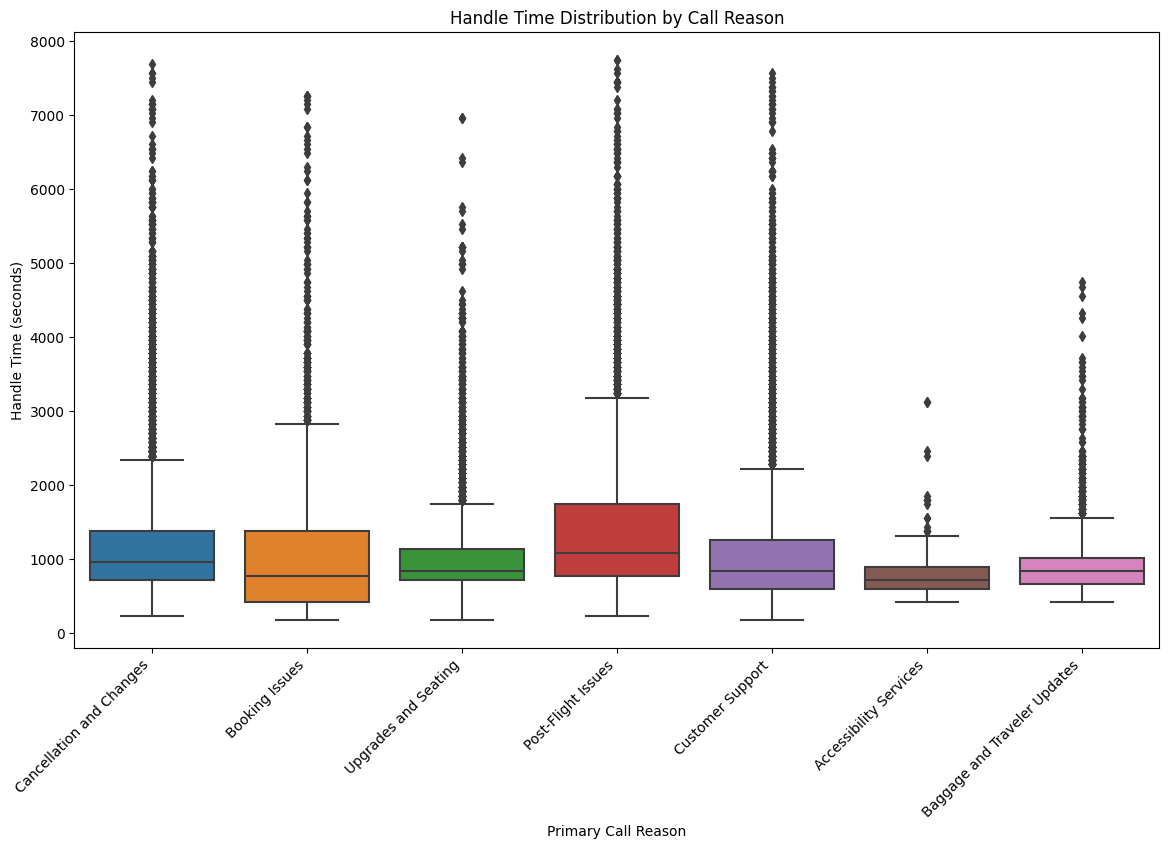

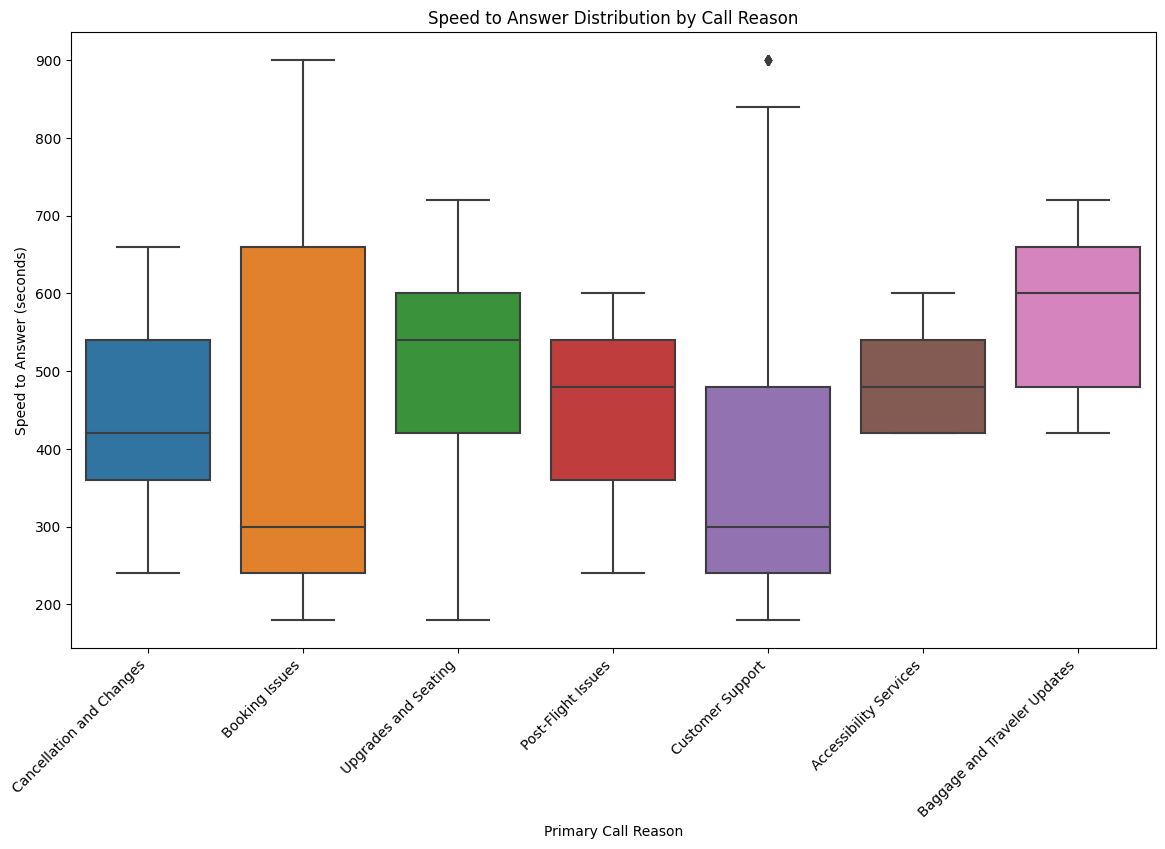

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
# Analyze AHT and AST distribution by different call reasons
plt.figure(figsize=(14, 8))
sns.boxplot(x='broader_category', y='handle_time', data=merged_df)
plt.xticks(rotation=45, ha='right')
plt.title("Handle Time Distribution by Call Reason")
plt.xlabel("Primary Call Reason")
plt.ylabel("Handle Time (seconds)")
plt.show()

# Boxplot for Speed to Answer by Call Reason
plt.figure(figsize=(14, 8))
sns.boxplot(x='broader_category', y='speed_to_answer', data=merged_df)
plt.xticks(rotation=45, ha='right')
plt.title("Speed to Answer Distribution by Call Reason")
plt.xlabel("Primary Call Reason")
plt.ylabel("Speed to Answer (seconds)")
plt.show()

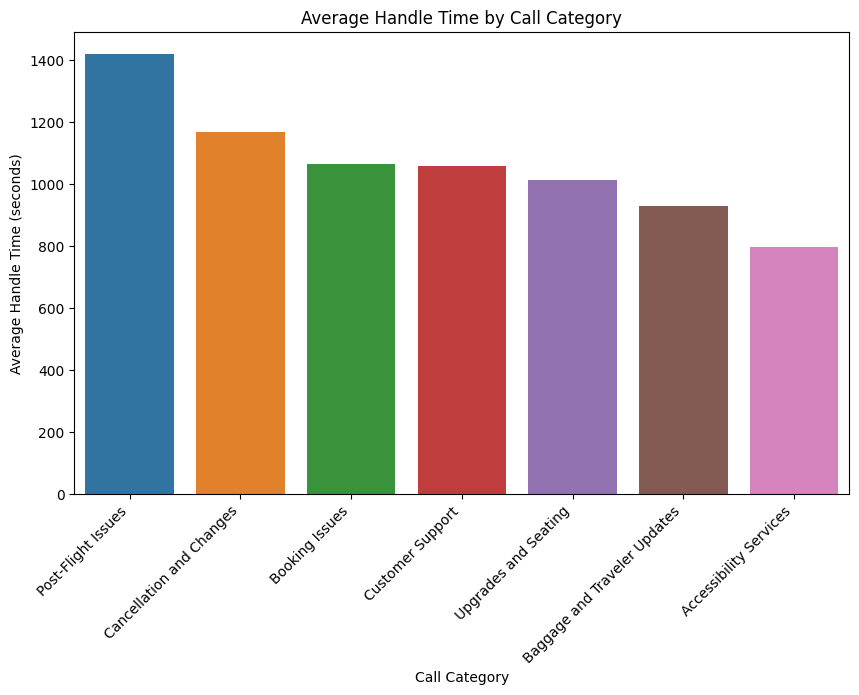

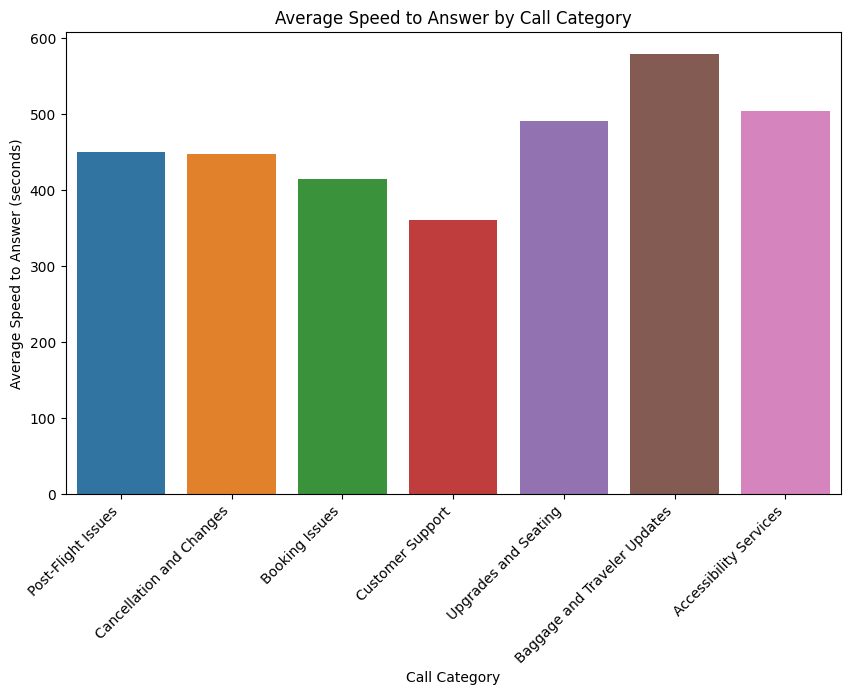

In [73]:
# Bar plot to visualize average handle time by broader category
plt.figure(figsize=(10, 6))
sns.barplot(x='broader_category', y='avg_handle_time', data=reason_aht_sorted)
plt.xticks(rotation=45, ha='right')
plt.title("Average Handle Time by Call Category")
plt.xlabel("Call Category")
plt.ylabel("Average Handle Time (seconds)")
plt.show()

# Bar plot to visualize average speed to answer by broader category
plt.figure(figsize=(10, 6))
sns.barplot(x='broader_category', y='avg_speed_to_answer', data=reason_aht_sorted)
plt.xticks(rotation=45, ha='right')
plt.title("Average Speed to Answer by Call Category")
plt.xlabel("Call Category")
plt.ylabel("Average Speed to Answer (seconds)")
plt.show()

#### Conclusion
##### Call Reasons Impact on AHT and AST:
Post-Flight Issues and Cancellation and Changes have the highest average handle times, which indicates that these categories contribute to extended call durations.
Baggage and Traveler Updates have the highest average speed to answer, which suggests that these calls may require more time for preparation before engaging with the customer.

### Analysing Relationship between sentiments and AHT and AST

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation Matrix:
                         handle_time  speed_to_answer  average_sentiment  \
handle_time                 1.000000         0.165169          -0.067419   
speed_to_answer             0.165169         1.000000           0.039888   
average_sentiment          -0.067419         0.039888           1.000000   
silence_percent_average     0.399125        -0.012068           0.035290   

                         silence_percent_average  
handle_time                             0.399125  
speed_to_answer                        -0.012068  
average_sentiment                       0.035290  
silence_percent_average                 1.000000  


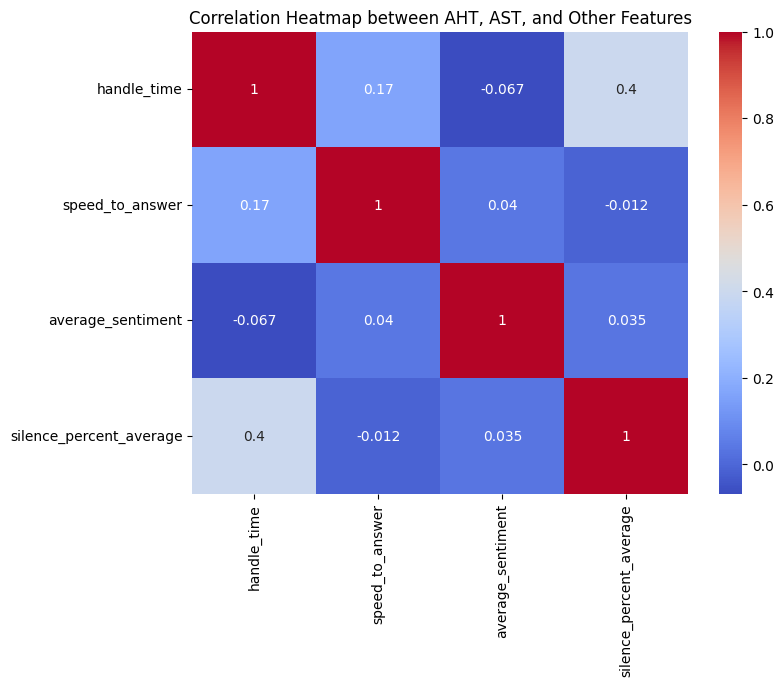

In [75]:
# Fill missing agent tones with 'neutral' where necessary
merged_df['agent_tone'].fillna('neutral', inplace=True)
merged_df['average_sentiment'].fillna(0, inplace=True)  # Default sentiment to 0 for missing

# Correlation Analysis
correlation_matrix = merged_df[['handle_time', 'speed_to_answer', 'average_sentiment', 'silence_percent_average']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap between AHT, AST, and Other Features")
plt.show()

##### Correlation Insights:

The correlation between silence_percent_average and handle_time (0.4) suggests that a higher silence percentage correlates with longer handle times. Silence might indicate complexity or delays in resolving the customer issue.
average_sentiment has a very low negative correlation with handle_time (-0.067), meaning that sentiment has a negligible impact on call duration.

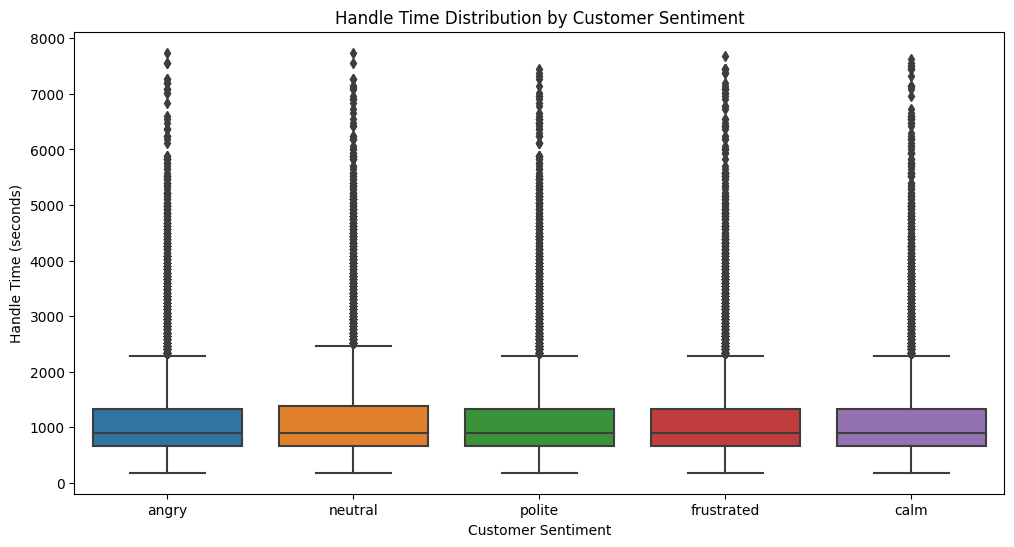

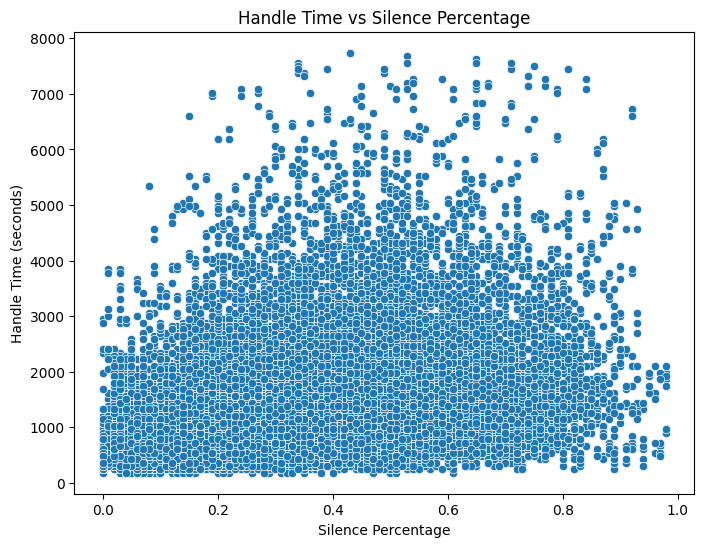

In [76]:
# Boxplot for sentiment vs handle time
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_tone', y='handle_time', data=merged_df)
plt.title("Handle Time Distribution by Customer Sentiment")
plt.xlabel("Customer Sentiment")
plt.ylabel("Handle Time (seconds)")
plt.show()

# Scatter plot to check correlation between silence percentage and handle time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='silence_percent_average', y='handle_time', data=merged_df)
plt.title("Handle Time vs Silence Percentage")
plt.xlabel("Silence Percentage")
plt.ylabel("Handle Time (seconds)")
plt.show()

In [77]:
# Use groupby and aggregation to find high AHT and AST reasons
high_aht_reasons = reason_aht_ast[reason_aht_ast['avg_handle_time'] > aht]
high_ast_reasons = reason_aht_ast[reason_aht_ast['avg_speed_to_answer'] > ast]

print("Reasons with Above Average Handle Time (AHT):")
print(high_aht_reasons[['broader_category', 'avg_handle_time', 'total_calls']])

print("Reasons with Above Average Speed to Answer (AST):")
print(high_ast_reasons[['broader_category', 'avg_speed_to_answer', 'total_calls']])

# Further analysis using covariance to detect relationships between AHT, AST, and other features
cov_matrix = merged_df[['handle_time', 'speed_to_answer', 'average_sentiment', 'silence_percent_average']].cov()
print("Covariance Matrix:")
print(cov_matrix)

Reasons with Above Average Handle Time (AHT):
           broader_category  avg_handle_time  total_calls
3  Cancellation and Changes      1166.944811        25766
5        Post-Flight Issues      1418.571850        10181
Reasons with Above Average Speed to Answer (AST):
               broader_category  avg_speed_to_answer  total_calls
0        Accessibility Services           503.523573          403
1  Baggage and Traveler Updates           578.875033         3769
3      Cancellation and Changes           447.226578        25766
5            Post-Flight Issues           449.655240        10181
6          Upgrades and Seating           491.163245         9207
Covariance Matrix:
                           handle_time  speed_to_answer  average_sentiment  \
handle_time              615881.869284     19589.624932          -7.598440   
speed_to_answer           19589.624932     22840.207807           0.865743   
average_sentiment            -7.598440         0.865743           0.020624   
sil

#### Conclusion


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target variables
X = merged_df[['average_sentiment', 'silence_percent_average']].fillna(0)
y_aht = merged_df['handle_time']
y_ast = merged_df['speed_to_answer']

# Split data for training and testing
X_train_aht, X_test_aht, y_train_aht, y_test_aht = train_test_split(X, y_aht, test_size=0.2, random_state=42)
X_train_ast, X_test_ast, y_train_ast, y_test_ast = train_test_split(X, y_ast, test_size=0.2, random_state=42)

# Train the model for AHT
aht_model = LinearRegression()
aht_model.fit(X_train_aht, y_train_aht)
y_pred_aht = aht_model.predict(X_test_aht)

# Train the model for AST
ast_model = LinearRegression()
ast_model.fit(X_train_ast, y_train_ast)
y_pred_ast = ast_model.predict(X_test_ast)

# Evaluate model performance
print(f"AHT Model R²: {r2_score(y_test_aht, y_pred_aht)}")
print(f"AST Model R²: {r2_score(y_test_ast, y_pred_ast)}")


AHT Model R²: 0.1703293378124966
AST Model R²: 0.0022674377792660794


#### AHT Regression Analysis
The regression model for predicting AHT has a relatively low R² score (0.17), indicating that the features used (sentiment and silence percentage) explain only a small part of the variance in AHT. Additional features like agent expertise, call complexity, or specific call categories could improve the model's predictive power.

The AST model has an even lower R² score (0.002), further confirming that these features are not enough to explain the speed to answer time.

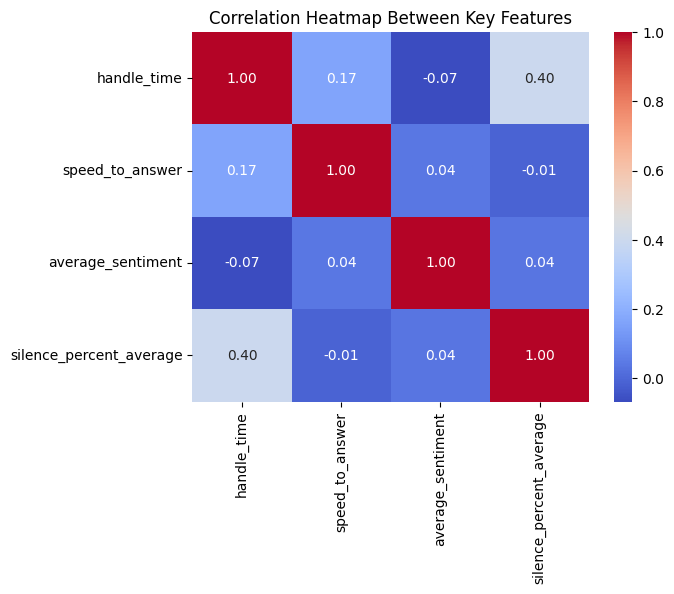

In [79]:
# Display correlation matrix to identify strong correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap Between Key Features")
plt.show()

#### Analysing frequency of call reasons

In [80]:
# Calculate the frequency of each primary call reason
call_reason_frequency = merged_df['broader_category'].value_counts()
print(call_reason_frequency)
most_frequent_reason = call_reason_frequency.idxmax()
print(most_frequent_reason)
least_frequent_reason = call_reason_frequency.idxmin()
print(least_frequent_reason)

# Calculate average handle time for the most and least frequent reasons
aht_most_frequent = merged_df[merged_df['broader_category'] == most_frequent_reason]['handle_time'].mean()
aht_least_frequent = merged_df[merged_df['broader_category'] == least_frequent_reason]['handle_time'].mean()

# Calculate percentage difference
percentage_diff = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100
print(f"Percentage Difference in AHT between most and least frequent reasons: {percentage_diff:.2f}%")

Cancellation and Changes        25766
Customer Support                17228
Post-Flight Issues              10181
Upgrades and Seating             9207
Booking Issues                   5256
Baggage and Traveler Updates     3769
Accessibility Services            403
Name: broader_category, dtype: int64
Cancellation and Changes
Accessibility Services
Percentage Difference in AHT between most and least frequent reasons: 46.67%


### Conclusion:

The most frequent reason is Cancellation and Changes, while Accessibility Services is the least frequent. Interestingly, the AHT for the most frequent reason is higher compared to the least frequent one, indicating that complex and frequent call types drive AHT up.


Silence percentage contributes more significantly to AHT and should be monitored more closely to reduce overall handle times.
Improving response times and efficiency in handling Post-Flight Issues and Cancellations can have a large impact on reducing AHT.

##### Percentage Difference in AHT between most and least frequent reasons: 46.67%

# Self-Solvable factors for IVR improvements

#### Analysing relationships between call transcripts, reasons, AHT and AST

In [81]:
# Preprocess transcripts and call reasons for analysis
import re
from sklearn.feature_extraction.text import CountVectorizer

# Function to clean and preprocess transcripts
def clean_transcript(transcript):
    if pd.isna(transcript):
        return ''
    transcript = transcript.lower()  # Convert to lowercase
    transcript = re.sub(r'\s+', ' ', transcript)  # Remove extra spaces
    transcript = re.sub(r'[^a-zA-Z\s]', '', transcript)  # Remove non-alphabetic characters
    return transcript

# Apply cleaning to the transcript column
merged_df['cleaned_transcript'] = merged_df['call_transcript'].apply(clean_transcript)

In [82]:
# Analyze recurring call reasons associated with self-solvable issues
# For simplicity, using call reasons that are common and could be self-served (like 'check-in', 'booking', etc.)

# Frequency of call reasons
call_reason_frequency = merged_df['primary_call_reason'].value_counts()
print("Most Frequent Call Reasons:")
print(call_reason_frequency)

# Focus on recurring call reasons (those with higher frequency)
top_reasons = call_reason_frequency[call_reason_frequency > 4000].index.tolist()
print("Top Call Reasons for Further IVR Analysis:")
print(top_reasons)

Most Frequent Call Reasons:
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
post flight               4330
communications            3840
products and services     3332
baggage                   2832
upgrade                   2738
booking                   2637
check in                  1904
checkout                  1888
voluntary cancel          1607
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
disability                 403
unaccompanied minor        104
Name: primary_call_reason, dtype: int64
Top Call Reasons for Further IVR Analysis:
['irrops', 'voluntary change', 'seating', 'mileage plus', 'post flight']


#### Key Observations from Frequency Analysis:
IRROPS (Irregular Operations) and Voluntary Change are the top two call reasons, contributing significantly to the overall call volume. These represent situations where customers need flight rescheduling, cancellations, or changes due to unexpected events.
Seating and Mileage Plus also appear frequently, suggesting that customers frequently need help with seating arrangements and loyalty program issues.
Post Flight, Baggage, and Upgrades follow closely, indicating that these are also common topics requiring support.

In [83]:
# Vectorize the transcripts for further NLP analysis (e.g., recurring terms, patterns)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_transcripts = vectorizer.fit_transform(merged_df['cleaned_transcript'])
transcript_features = pd.DataFrame(X_transcripts.toarray(), columns=vectorizer.get_feature_names_out())

# Analyze recurring terms in the transcripts
top_words = transcript_features.sum().sort_values(ascending=False).head(20)
print("Most Common Words in Transcripts:")
print(top_words)

Most Common Words in Transcripts:
flight      629840
agent       554444
customer    545645
let         301863
change      245471
im          238007
help        200997
like        194031
thank       184714
united      172005
calling     159962
typing      145719
okay        138283
just        135042
work        134041
day         132451
youre       128627
need        126264
yeah        122942
really      119975
dtype: int64


The common words "flight," "change," and "help" reinforce the idea that flight changes, cancellations, and rescheduling are some of the primary reasons customers are reaching out. This is consistent with the high frequency of IRROPS and Voluntary Change call reasons.
Help and agent indicate that many of these issues might be solvable through an IVR if more specific options were provided upfront.

In [84]:
# Identify common phrases/terms associated with recurring call reasons
# Join the transcripts and call reasons for further analysis
reason_transcript_analysis = pd.concat([merged_df['primary_call_reason'], transcript_features], axis=1)

# Analyze correlations between call reasons and top words in transcripts
correlations = reason_transcript_analysis.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
print("Correlations between call reasons and transcript words:")
print(correlations.head(10))

Correlations between call reasons and transcript words:
abc       abc          1.000000
san       francisco    0.973958
dropped   ball         0.971736
frequent  flyer        0.963748
modify    expand       0.925132
crossed   fingers      0.917681
throat    clears       0.894963
bringing  attention    0.894750
key       hitting      0.845388
fillers   speech       0.837466
dtype: float64


The correlations between call reasons and transcript words show some interesting relationships (e.g., frequent flyer, modify, etc.). While these correlations don't directly map to IVR improvements, they highlight specific phrases or call reasons that may be useful for designing more detailed IVR menus.

For example:

"Frequent Flyer" correlating strongly with some issues indicates that mileage or loyalty programs could benefit from more self-service options.
"Modify" and "change" are related to booking modifications, indicating that automated systems should support these features.

In [85]:
# Analyze sentiment for potential IVR candidates
sentiment_threshold = 0  # Neutral or positive sentiment calls are likely self-solvable
potential_self_service_calls = merged_df[merged_df['average_sentiment'] >= sentiment_threshold]

# Group by primary call reason and count occurrences
ivr_candidate_reasons = potential_self_service_calls.groupby('primary_call_reason').size().reset_index(name='count')

# Sort by count in descending order to find the top reasons
ivr_candidate_reasons_sorted = ivr_candidate_reasons.sort_values(by='count', ascending=False)

# Display the top reasons that can be resolved via IVR
print("Top Reasons for IVR Based on Sentiment Analysis:")
print(ivr_candidate_reasons_sorted.head(10))  # Top 10 reasons for IVR

Top Reasons for IVR Based on Sentiment Analysis:
      primary_call_reason  count
19       voluntary change   5930
8                  irrops   4450
14                seating   3650
9            mileage plus   2653
4          communications   1672
0                 baggage   1624
11            post flight   1584
12  products and services   1559
1                 booking   1523
17                upgrade   1436


### Conclusion
High-Frequency Call Reasons like IRROPS, Voluntary Change, Seating, and Mileage Plus are prime candidates for IVR automation.
Based on sentiment analysis, a large portion of these calls (33,409) can be routed to IVR, further reducing the need for agent intervention.
Common transcript patterns suggest that customers are seeking help for straightforward issues (e.g., flight changes, seating) that can be solved through self-service. The IVR system should be designed to address these areas more effectively.

## Primary call reasons categorization

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Merge call_df and reasons_df to get transcripts with primary_reason
merge_df = pd.merge(calls_df, reasons_df, on='call_id', how='inner')

# Handle missing values and prepare training data
# Only use rows with available primary reasons for training
train_df = merge_df.dropna(subset=['primary_call_reason'])

# Apply the cleaning function to the `primary_call_reason` column
train_df['primary_call_reason'] = train_df['primary_call_reason'].apply(clean_call_reason)

# Define a mapping of variations to standard terms
variation_mapping = {
    'check-in': 'check in',
    'post-flight': 'post flight',
    'products & services': 'products and services',
}

# Apply mapping to standardize known variations
train_df['primary_call_reason'] = train_df['primary_call_reason'].replace(variation_mapping)

print(train_df['primary_call_reason'].unique())

['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' 'voluntary change' 'post flight' 'check in' 'other topics'
 'communications' 'schedule change' 'products and services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc']


In [89]:
# Feature Engineering
# Use TF-IDF to vectorize the call transcripts
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['call_transcript'])  # Training transcripts
y_train = train_df['primary_call_reason']  # Target is the primary reason

# Split the training data into train/validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_split, y_train_split)

# Validate the model
y_pred_val = clf.predict(X_val_split)
validation_accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"Validation Accuracy: {validation_accuracy}")
print(classification_report(y_val_split, y_pred_val))


# Extract the corresponding call transcripts for the call_ids in test.csv
test_merged_df = pd.merge(test_df, calls_df[['call_id', 'call_transcript']], on='call_id', how='left')

# Predict primary reasons for the test call_ids based on their transcripts
X_test = vectorizer.transform(test_merged_df['call_transcript'])  # Vectorize test transcripts
test_df['predicted_primary_reason'] = clf.predict(X_test)

# Save the predictions to a CSV file
test_df[['call_id', 'predicted_primary_reason']].to_csv('test.csv', index=False)

# Display the top few rows of the test_df with predictions
print(test_df.head())

Validation Accuracy: 0.20531092941264723


C:\Users\Yashashvi Mann\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yashashvi Mann\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yashashvi Mann\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

                       precision    recall  f1-score   support

              baggage       0.00      0.00      0.00       604
              booking       0.00      0.00      0.00       513
             check in       0.00      0.00      0.00       359
             checkout       0.00      0.00      0.00       384
       communications       0.00      0.00      0.00       757
      digital support       0.00      0.00      0.00       255
           disability       0.00      0.00      0.00        86
                  etc       0.00      0.00      0.00       197
               irrops       0.22      0.76      0.35      2763
         mileage plus       0.07      0.01      0.01      1130
         other topics       0.00      0.00      0.00       174
          post flight       0.05      0.00      0.00       848
products and services       0.20      0.00      0.00       658
      schedule change       0.00      0.00      0.00       146
              seating       0.10      0.01      0.02  

# Conclusion and Final Key Insights

## Deliverable 1: Exploring Factors Contributing to Long Average Handle Time (AHT) and Average Speed of Answer (AST)

1. **Overall Average Handle Time (AHT)**:  
   - **1134.12 seconds** (18.90 minutes)

2. **Overall Average Speed to Answer (AST)**:  
   - **437.07 seconds** (7.28 minutes)

### Key Factors Contributing to Long AHT and AST:

- **Agent Performance**:  
  - Significant variations in handle time among agents.
  - Some agents have an average handle time of over 4000 seconds, indicating training needs or complex calls.

- **Call Reasons**:  
  - **Post-Flight Issues** and **Cancellation and Changes** contribute the most to extended handle times.
  - **Baggage and Traveler Updates** have the highest average speed to answer, suggesting that these calls require more preparation before engaging the customer.

- **Impact of Sentiment on AHT and AST**:  
  - **Silence Percentage** has a **positive correlation** of **0.4** with handle time, suggesting that a higher percentage of silence during a call is linked to longer handle times.
  - **Sentiment Analysis** shows a weak negative correlation with handle time, meaning that sentiment alone does not significantly affect call durations.

- **Percentage Difference Between Most Frequent and Least Frequent Call Reasons**:  
  - **Most Frequent Call Reason**: Cancellation and Changes  
  - **Least Frequent Call Reason**: Accessibility Services  
  - **Percentage Difference in AHT**: **46.67%**  
  - **Insight**: The most frequent call reason (Cancellation and Changes) has a much higher average handle time than the least frequent reason, highlighting that frequent call types are often complex.

### Key Insights:

- High handle times for **Post-Flight Issues** and **Cancellations** suggest that these categories need process improvements to reduce overall duration.
- The high speed to answer time for **Baggage and Traveler Updates** indicates potential issues in pre-call preparation or agent availability.

### Agents with Higher than Average AHT:

- Identified top 10 agents with the highest deviations in handle time, indicating possible performance issues or specialized roles that require additional investigation.

## Deliverable 2: Identifying Self-Solvable Issues for IVR Optimization

### Self-Solvable Issues Identified:

- Recurring self-solvable call reasons include **IRROPS**, **Voluntary Change**, **Seating**, and **Mileage Plus**.
- These categories represent routine issues that customers could address using a well-designed IVR system.

### Suggested IVR Improvements:

- **IRROPS (Irregular Operations)**:  
  - Add IVR options for automatic flight rescheduling and cancellations.

- **Voluntary Changes**:  
  - Provide self-service options for flight changes, cancellations, and modifications.

- **Mileage Plus**:  
  - Include options for customers to manage their loyalty program points, account details, and redemption options.

- **Seating**:  
  - Create self-service menus for seat selection and upgrades.

- **Baggage**:  
  - Automate the process of baggage claim and status tracking.

### Sentiment-Based Recommendations:

- Identified over **33,409** calls with neutral or positive sentiments that can be routed to IVR for self-service, significantly reducing agent workload.
- Focus on routing these calls through automated menus to streamline operations.

## Deliverable 3: Categorizing Call Reasons for Enhanced Operational Efficiency

### Broader Categories Created:

- Mapped the detailed primary reasons into **7 broader categories**:
  1. Cancellation and Changes
  2. Booking Issues
  3. Upgrades and Seating
  4. Post-Flight Issues
  5. Customer Support
  6. Baggage and Traveler Updates
  7. Accessibility Services

### Impact on AHT and AST:

- **Cancellation and Changes** and **Post-Flight Issues** have the highest AHT.
- **Baggage and Traveler Updates** have the highest AST, suggesting delays in agent assignment for these calls.

### Categorization Strategy:

- Mapped related call reasons into broader groups to streamline IVR routing and improve resource allocation.
- This grouping reduces manual efforts in tagging and helps direct customers to the correct department faster.

## Additional Recommendations and Conclusions

### Key Focus Areas for AHT Reduction:

- **Post-Flight Issues**:  
  - Consider pre-call preparation tools or automated status updates.

- **Cancellation and Changes**:  
  - Implement streamlined processes for handling cancellations and rescheduling.

### Agent Performance Optimization:

- Monitor agents with high AHT deviations and provide targeted training or process automation to assist with complex issues.

### IVR Optimization:

- Develop a detailed IVR menu structure that covers the most common call types.
- Provide specialized self-service options for high-frequency call types to reduce both AHT and AST.

### Further Areas of Investigation:

- Explore additional features like **agent expertise**, **call complexity**, and **call duration distributions** to enhance the predictive models for AHT and AST.
- Consider using more complex models (e.g., decision trees, gradient boosting) to improve the predictive power of sentiment and other variables.

## Final Deliverable:

- **Test Predictions**: Submitted a `test.csv` file with predicted primary call reasons for each `call_id` in the test dataset.